# Right_hip(SA)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model ,models, layers, optimizers, utils
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow as tf           
import tensorflow.keras.layers as L
from tensorflow.keras import optimizers, Sequential, Model

In [4]:
tf.__version__

'2.9.0'

In [5]:
#GPU 용량 할당시키기 
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 2 GB of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3000)]) # limit in megabytes
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [6]:
sheet = pd.read_csv(r'AII_normal_patime2.csv', index_col = 0)
sheet = sheet.dropna()
# sheet

from sklearn.preprocessing import MinMaxScaler, StandardScaler
# scaler = MinMaxScaler()
scaler = StandardScaler()

In [7]:
angle = "right_hip_angle"

In [8]:
number = sheet[["num", angle]]
number

,num,right_hip_angle
2,1,75.017232
3,1,168.368680
4,1,157.340841
6,1,1.453606
7,1,2.807974
...,...,...
14983,30,5.721071
14984,30,3.866440
14985,30,2.362734
14986,30,7.902137


In [9]:
num = number["num"]
num = np.array(num)
num = list(dict.fromkeys(num))

# Train

In [14]:
train_num = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,26,27,28,29,30]

In [10]:
# epochs = 100
# batch = 32
# lr = 0.0001

In [11]:
# lstm_ae = models.Sequential()
# # Encoder
# lstm_ae.add(layers.LSTM(32, activation='relu', input_shape=(1000, 1), return_sequences=True))
# lstm_ae.add(tf.keras.layers.Dropout(rate=0.2))
# lstm_ae.add(layers.LSTM(16, activation='relu', return_sequences=False))
# lstm_ae.add(layers.RepeatVector(1))

# # Decoder
# lstm_ae.add(layers.LSTM(16, activation='relu', return_sequences=True))
# lstm_ae.add(tf.keras.layers.Dropout(rate=0.2))
# lstm_ae.add(layers.LSTM(32, activation='relu', return_sequences=True))
# lstm_ae.add(layers.TimeDistributed(layers.Dense(1)))

# lstm_ae.summary()

In [12]:
# for i in num:
#     number_num = number[number["num"]== i].dropna()
#     number_num = number_num[[angle]]
#     number_num = scaler.fit_transform(number_num)
#     number_num = np.reshape(number_num,(number_num.shape[0],1,1))
    
#     lstm_ae.compile(loss='mse', optimizer=optimizers.Adam(lr))
#     history = lstm_ae.fit(number_num, number_num, epochs=epochs, batch_size=batch)
    
#     plt.plot(history.history['loss'], label='train loss')
#     plt.legend()
#     plt.xlabel('Epoch'); plt.ylabel('loss')
#     plt.show()

# Pridict

In [2]:
lstm_ae = models.load_model("lstm_ae_right_hip(100_64_32_4_16_0.0001).h5")
lstm_ae.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1000, 32)          4352      
                                                                 
 dropout (Dropout)           (None, 1000, 32)          0         
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 repeat_vector (RepeatVector  (None, 1, 16)            0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 1, 16)             2112      
                                                                 
 dropout_1 (Dropout)         (None, 1, 16)             0         
                                                        

number :  1
10/10 [==============================] - 0s 4ms/step
(303,)


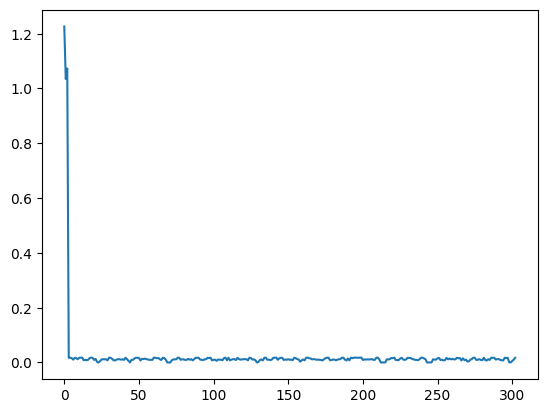

Reconstruction error threshold: 1.2263438045402595
number :  2
16/16 [==============================] - 0s 4ms/step
(504,)


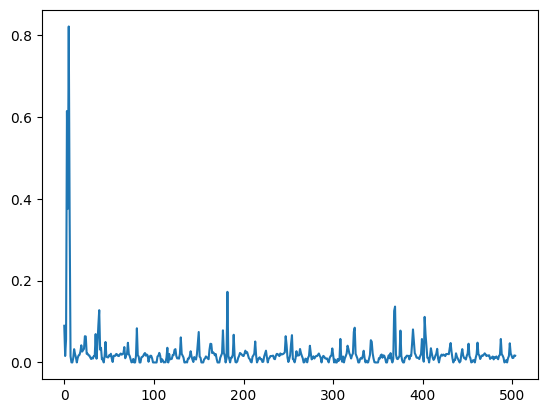

Reconstruction error threshold: 0.8213296803223307
number :  3
17/17 [==============================] - 0s 4ms/step
(535,)


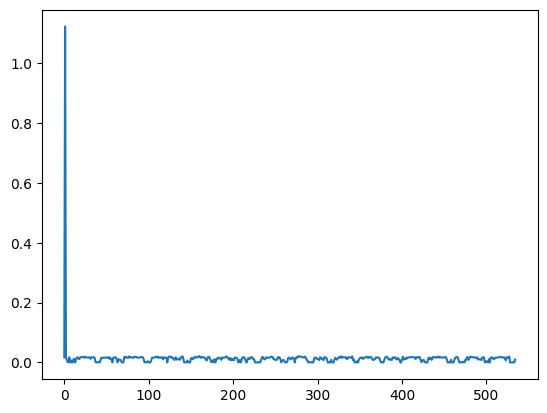

Reconstruction error threshold: 1.1230780538192993
number :  4
23/23 [==============================] - 0s 4ms/step
(717,)


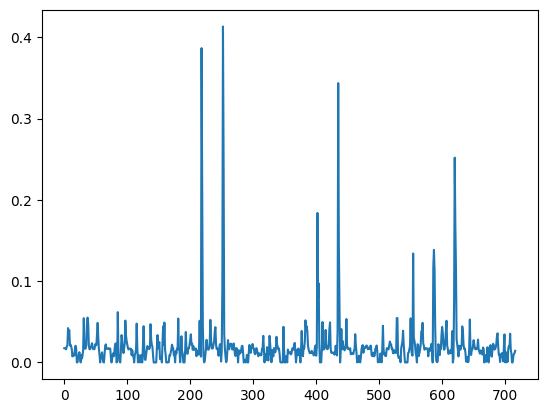

Reconstruction error threshold: 0.4134487313097259
number :  5
24/24 [==============================] - 0s 4ms/step
(741,)


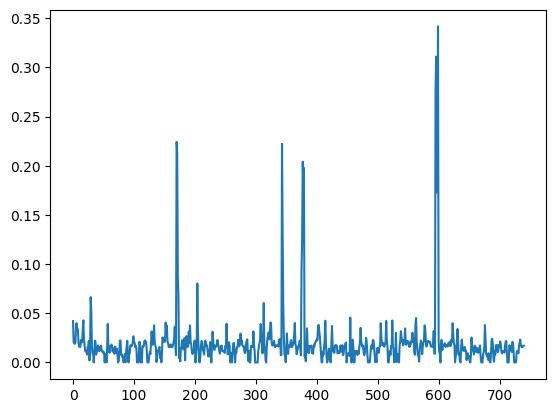

Reconstruction error threshold: 0.34153705828954595
number :  6
27/27 [==============================] - 0s 4ms/step
(853,)


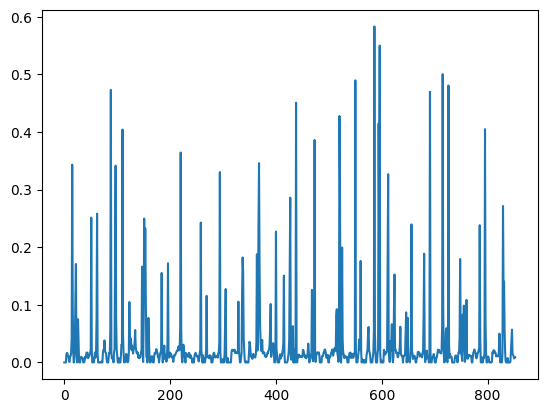

Reconstruction error threshold: 0.5831802600590696
number :  7
27/27 [==============================] - 0s 4ms/step
(845,)


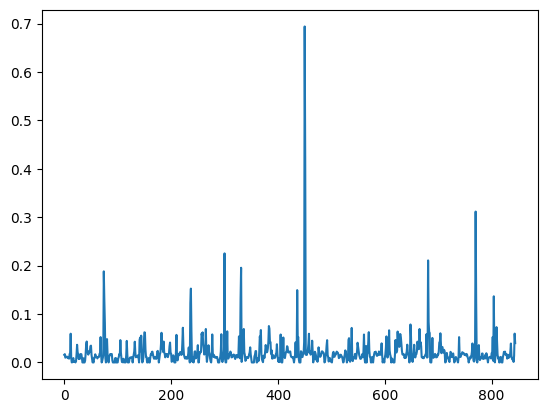

Reconstruction error threshold: 0.6940588037671531
number :  8
25/25 [==============================] - 0s 4ms/step
(773,)


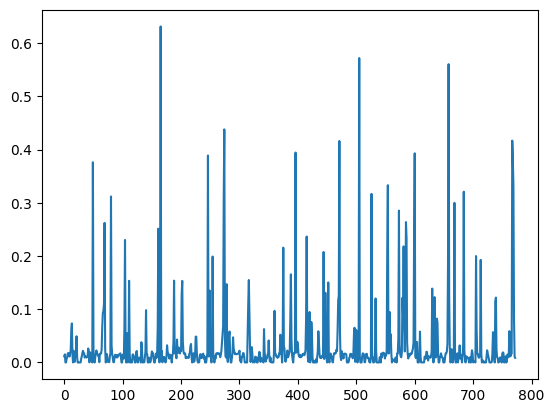

Reconstruction error threshold: 0.6314244953567109
number :  9
21/21 [==============================] - 0s 4ms/step
(655,)


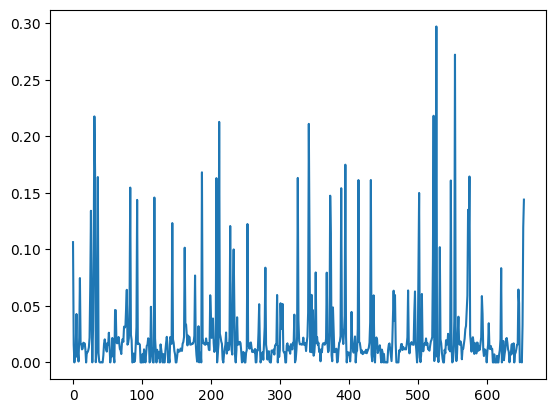

Reconstruction error threshold: 0.29723966855569744
number :  10
18/18 [==============================] - 0s 4ms/step
(557,)


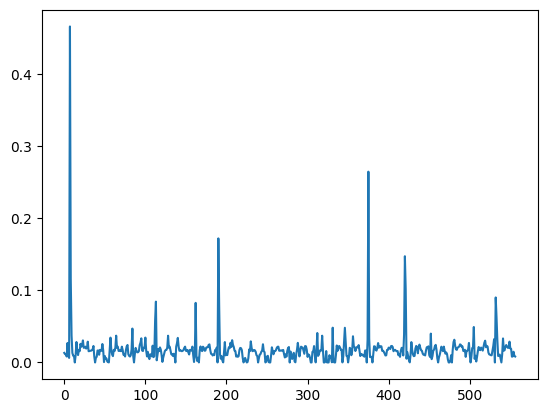

Reconstruction error threshold: 0.4666618163763042
number :  11
25/25 [==============================] - 0s 4ms/step
(777,)


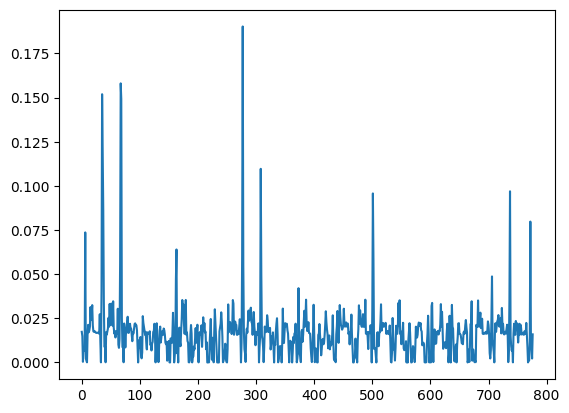

Reconstruction error threshold: 0.19030163956095325
number :  12
24/24 [==============================] - 0s 4ms/step
(757,)


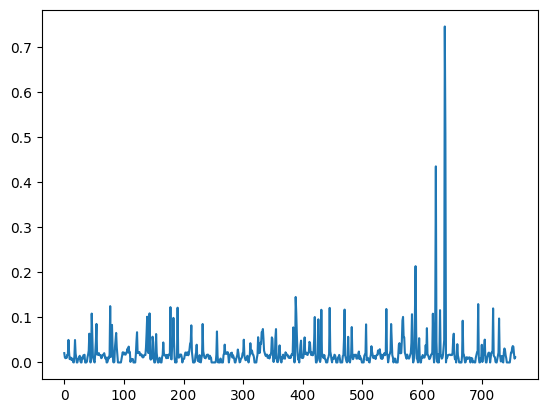

Reconstruction error threshold: 0.746556816847408
number :  13
19/19 [==============================] - 0s 4ms/step
(578,)


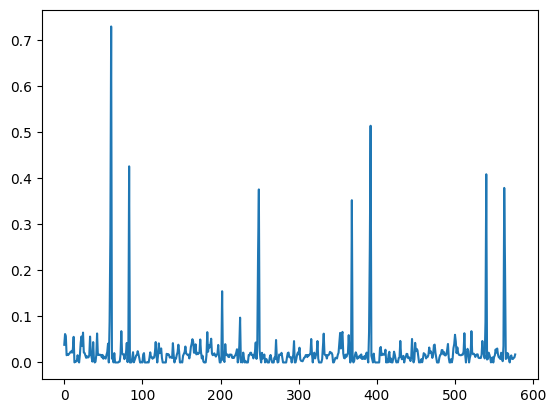

Reconstruction error threshold: 0.7292923005710799
number :  14
9/9 [==============================] - 0s 4ms/step
(280,)


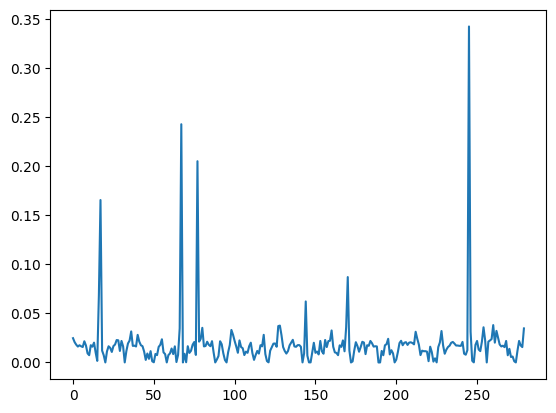

Reconstruction error threshold: 0.34234586540549966
number :  15
15/15 [==============================] - 0s 4ms/step
(463,)


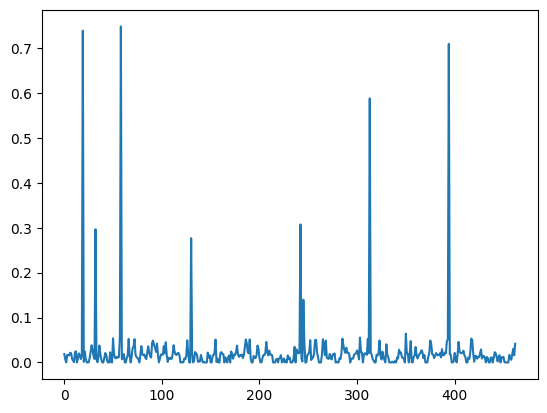

Reconstruction error threshold: 0.7478183864759617
number :  16
11/11 [==============================] - 0s 4ms/step
(327,)


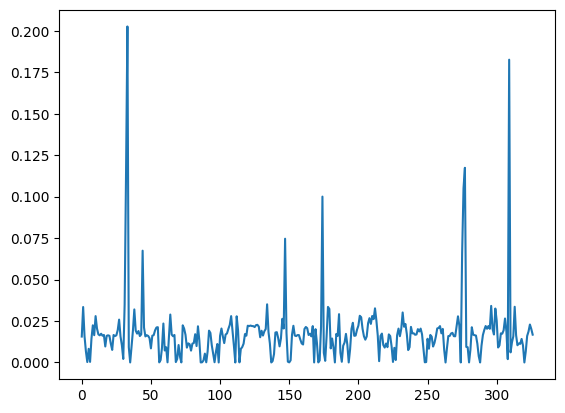

Reconstruction error threshold: 0.20260600409912677
number :  18
20/20 [==============================] - 0s 4ms/step
(623,)


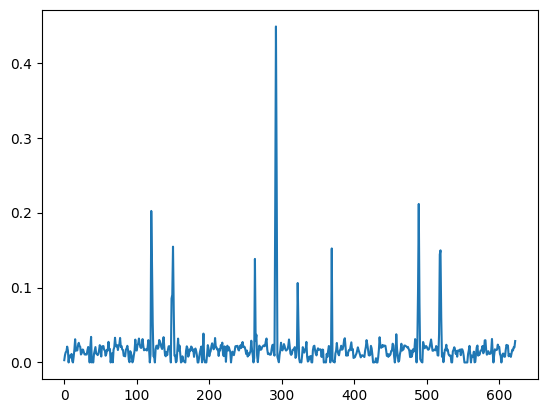

Reconstruction error threshold: 0.4484382382521389
number :  19
14/14 [==============================] - 0s 4ms/step
(441,)


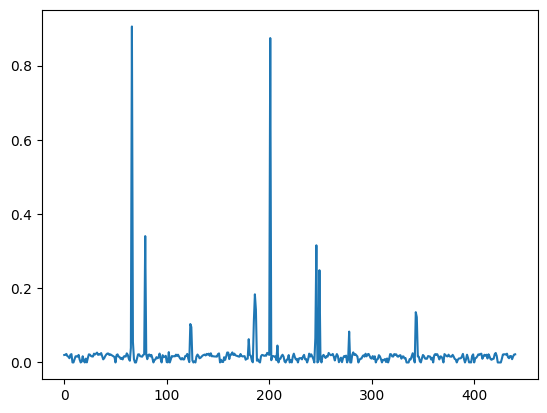

Reconstruction error threshold: 0.90564932328445
number :  20
18/18 [==============================] - 0s 5ms/step
(567,)


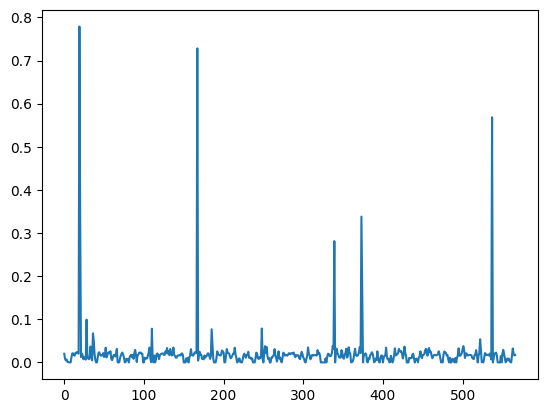

Reconstruction error threshold: 0.7789392703000533
number :  21
18/18 [==============================] - 0s 4ms/step
(553,)


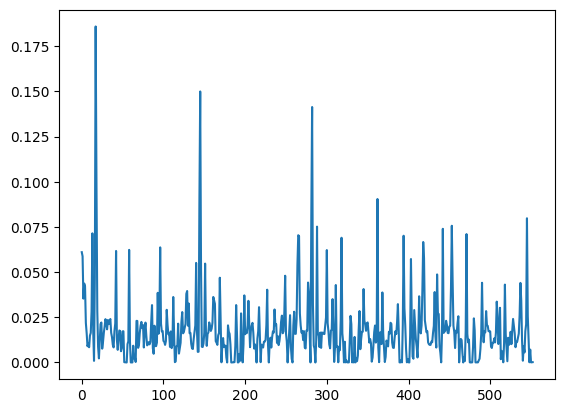

Reconstruction error threshold: 0.1859478453242925
number :  22
7/7 [==============================] - 0s 4ms/step
(207,)


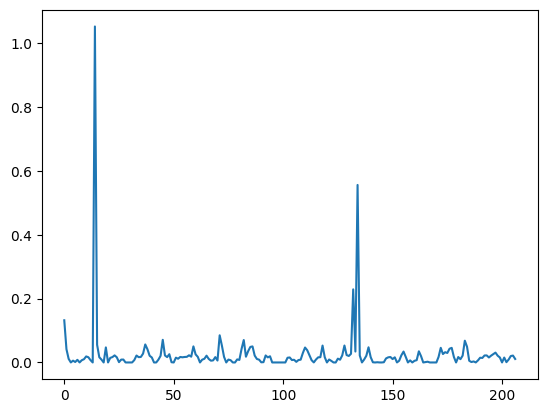

Reconstruction error threshold: 1.052835708188346
number :  26
15/15 [==============================] - 0s 6ms/step
(457,)


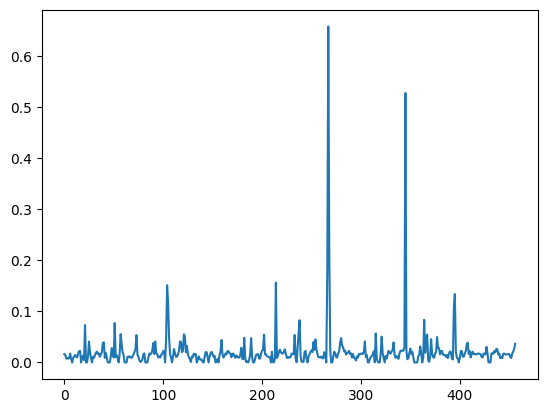

Reconstruction error threshold: 0.6579495419182864
number :  27
8/8 [==============================] - 0s 4ms/step
(240,)


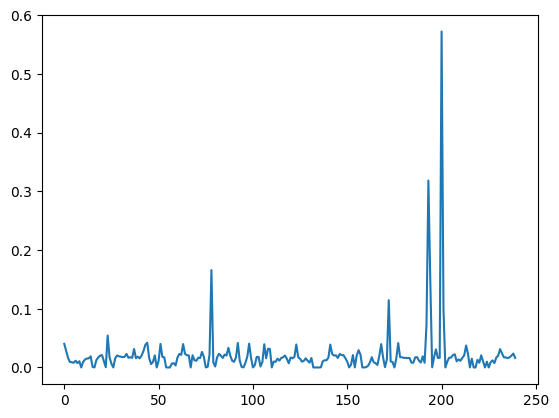

Reconstruction error threshold: 0.5723862603256642
number :  28
7/7 [==============================] - 0s 4ms/step
(199,)


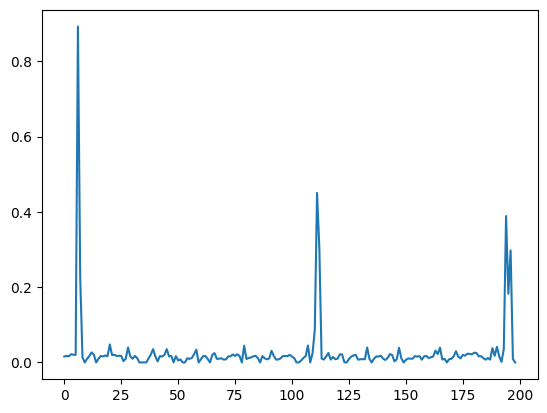

Reconstruction error threshold: 0.8927216347622955
number :  29
7/7 [==============================] - 0s 4ms/step
(197,)


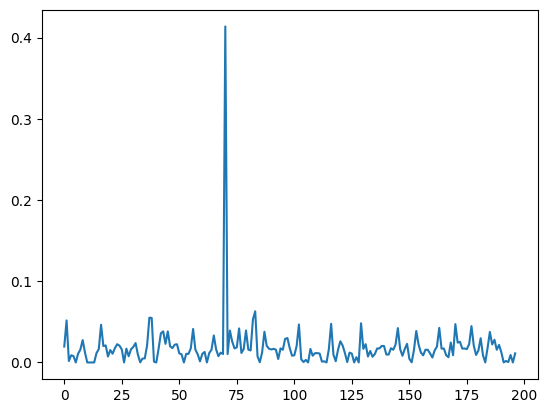

Reconstruction error threshold: 0.41370525108830336
number :  30
3/3 [==============================] - 0s 8ms/step
(70,)


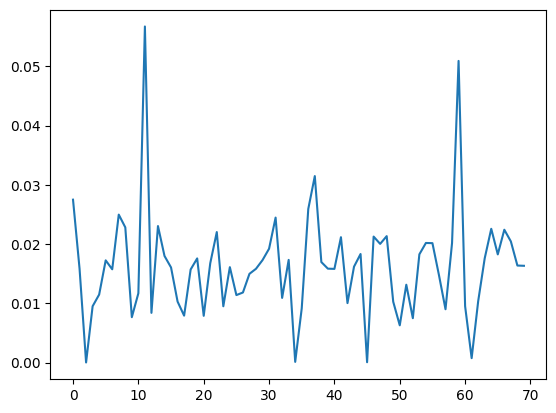

Reconstruction error threshold: 0.05671528979853995


In [17]:
threshold = []

for i in train_num:
    number_num = number[number["num"]== i].dropna()
    print("number : ",i)
    number_num = number_num[[angle]]
    number_num = scaler.fit_transform(number_num)
    number_num = np.reshape(number_num,(number_num.shape[0],1,1))
    
    train_x_predictions = lstm_ae.predict(number_num)
    train_mae_loss = np.mean(np.power(train_x_predictions - number_num,2), axis=1)
    train_mae_loss = train_mae_loss.flatten()
    
    print(train_mae_loss.shape)
    plt.plot(train_mae_loss)
    plt.show()
    
    train_mae_loss_max = np.max(train_mae_loss)
    threshold.append(train_mae_loss_max )
    
    print(f'Reconstruction error threshold: {train_mae_loss_max }')

In [18]:
threshold_ave = np.mean(threshold)
threshold_ave

0.5970196826384038

In [38]:
# print(epochs,"/" , lr ,"/",  threshold_ave)

=========================================================

# SA TEST

In [19]:
sar_csv = os.listdir("test/sar_long_in/")

-Patient_number :  03.csv
1/5 [=====>........................] - ETA: 0s

5/5 [==============================] - 0s 4ms/step
-Data len : 142
-Anomaly Area : 0.0
-Reconstruction error threshold : 1.2202649781299433
-Anomaly points: 1


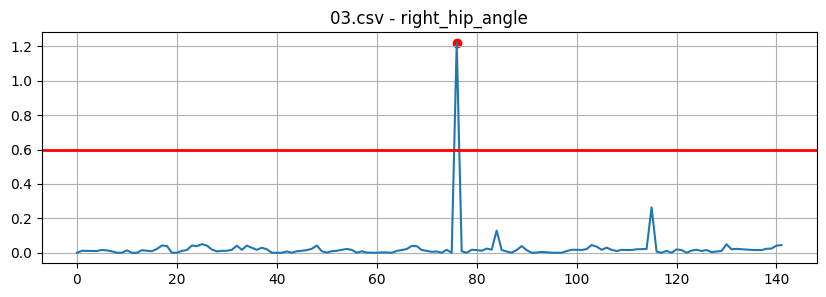

-Patient_number :  07.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 129
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.1504002560666082
-Anomaly points: 0


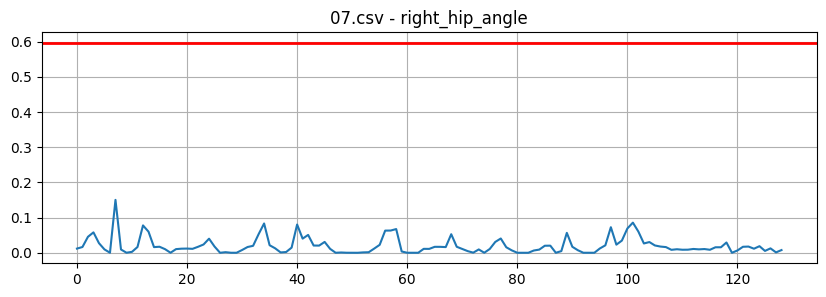

-Patient_number :  115.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 110
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.08488822266188023
-Anomaly points: 0


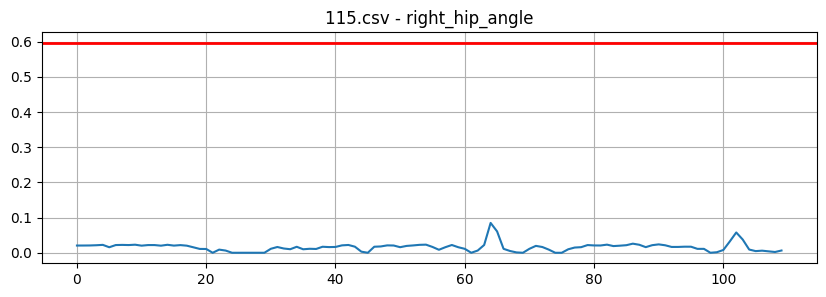

-Patient_number :  120.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 249
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.34777929244638217
-Anomaly points: 0


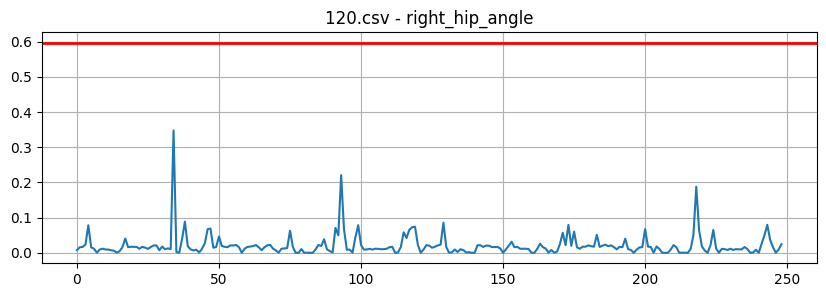

-Patient_number :  123.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 157
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.19191939915220177
-Anomaly points: 0


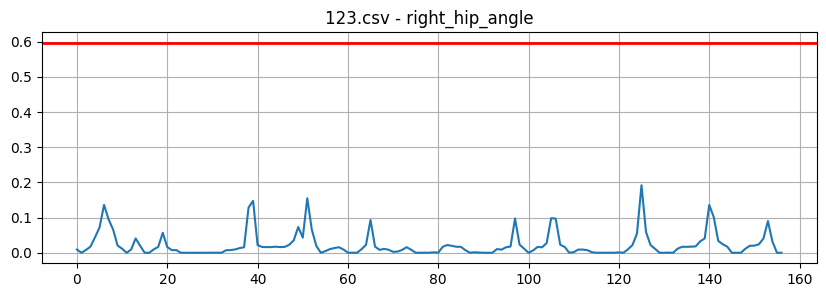

-Patient_number :  141.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 176
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.4992366036967698
-Anomaly points: 0


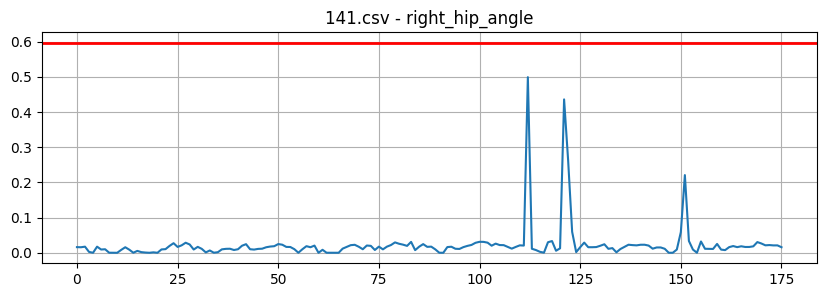

-Patient_number :  143.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 178
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.06862189213515366
-Anomaly points: 0


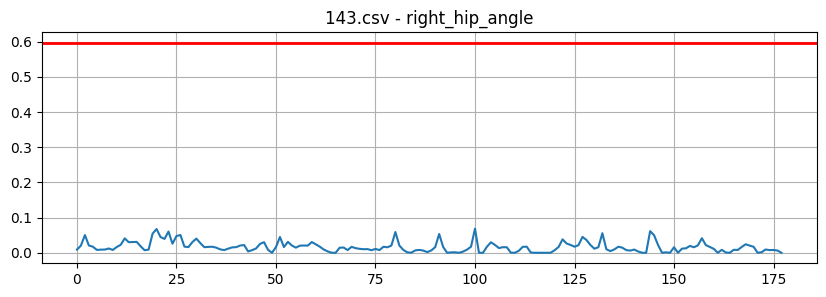

-Patient_number :  151.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 239
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.5945120792780033
-Anomaly points: 0


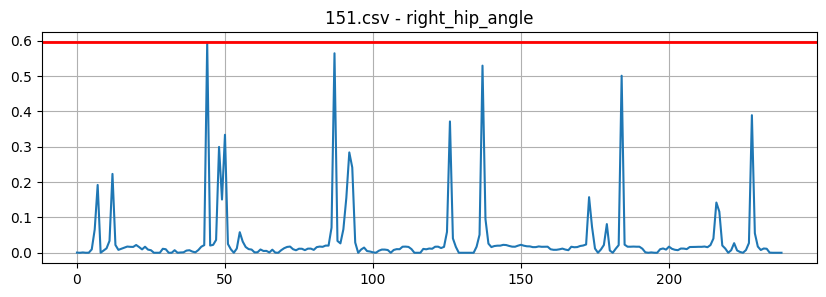

-Patient_number :  154.csv
8/8 [==============================] - 0s 5ms/step
-Data len : 230
-Anomaly Area : 0.0
-Reconstruction error threshold : 1.399581347017943
-Anomaly points: 1


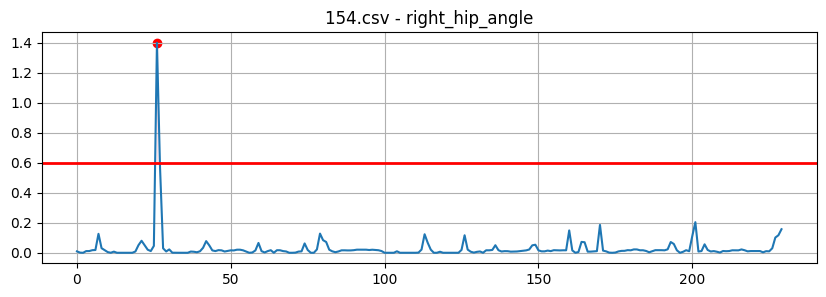

-Patient_number :  166.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 202
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.7599629489461783
-Anomaly points: 1


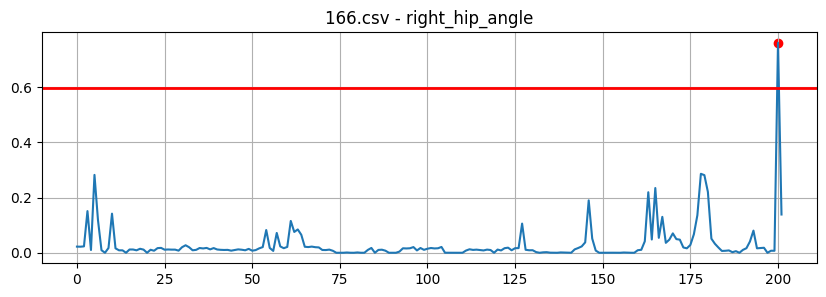

-Patient_number :  178.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 233
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.20960788375919234
-Anomaly points: 0


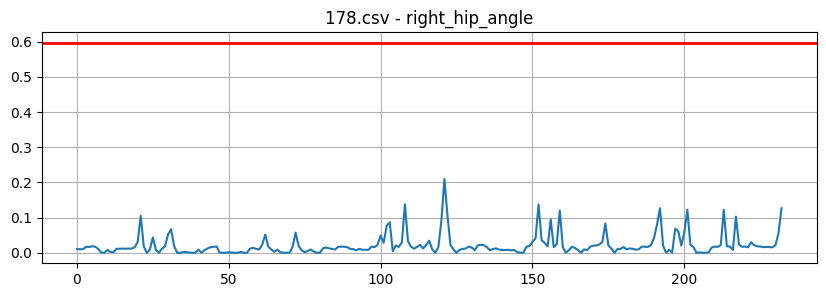

-Patient_number :  189.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 186
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.648162905572719
-Anomaly points: 1


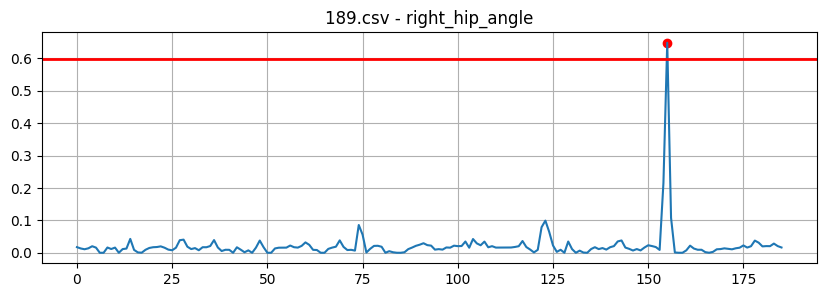

-Patient_number :  195.csv
4/4 [==============================] - 0s 5ms/step
-Data len : 108
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.12002756532206654
-Anomaly points: 0


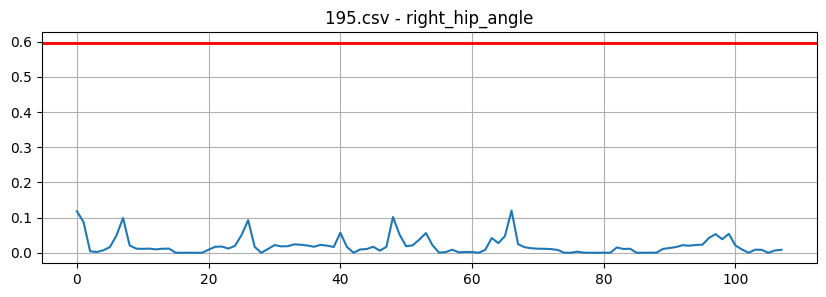

-Patient_number :  198.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 207
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.2964354023861916
-Anomaly points: 0


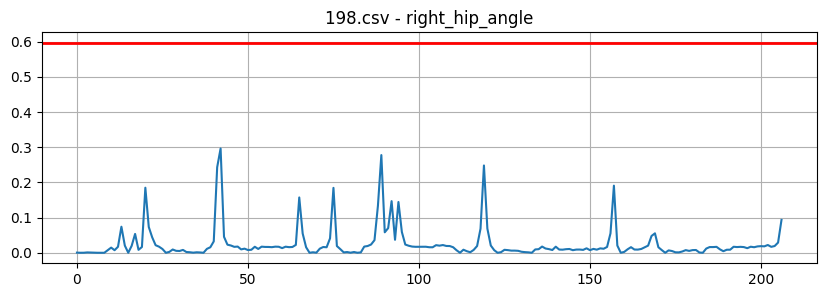

-Patient_number :  199.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 210
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.21599404974814607
-Anomaly points: 0


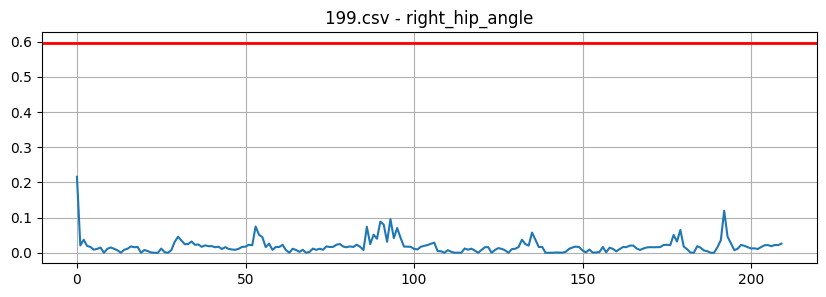

-Patient_number :  206.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 227
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.3388971105052562
-Anomaly points: 0


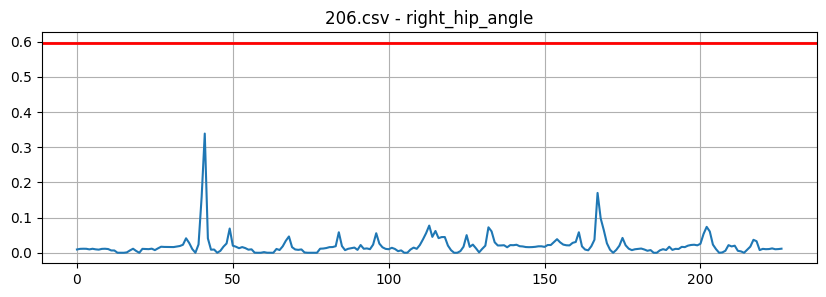

-Patient_number :  208.csv
6/6 [==============================] - 0s 5ms/step
-Data len : 182
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.4016210607511289
-Anomaly points: 0


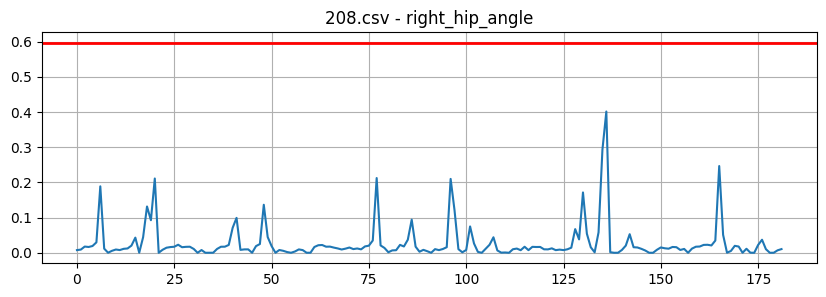

-Patient_number :  209.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 126
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.2243922812534673
-Anomaly points: 0


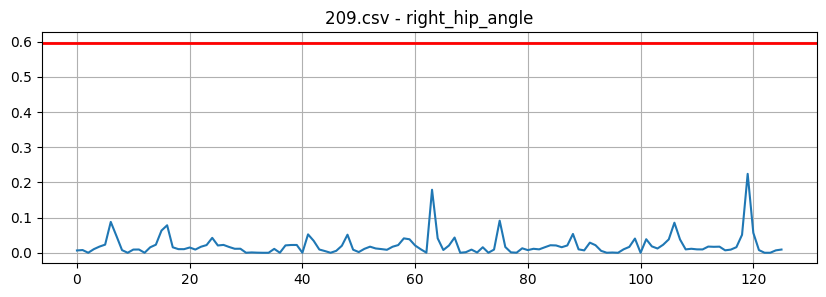

-Patient_number :  216.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 111
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.4395361568904763
-Anomaly points: 0


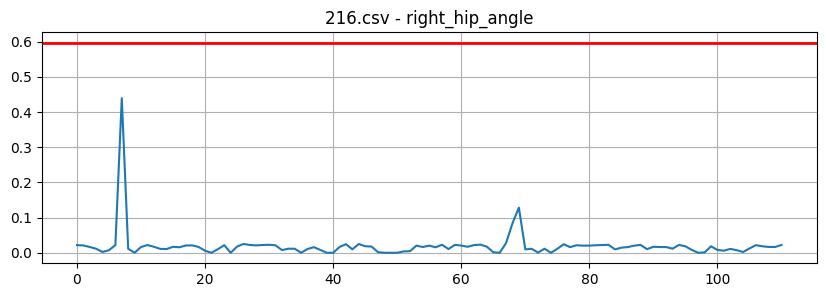

-Patient_number :  23.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 146
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.7076877120565545
-Anomaly points: 1


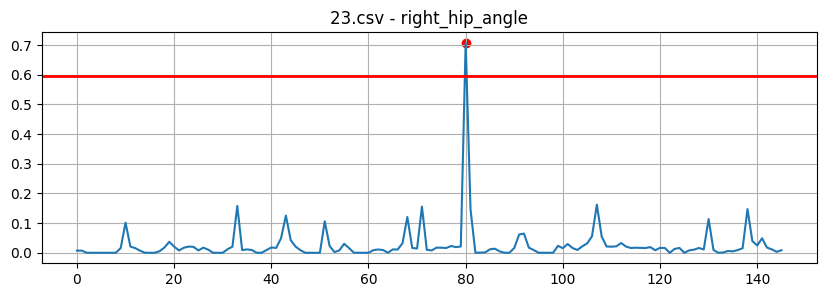

-Patient_number :  230.csv
8/8 [==============================] - 0s 5ms/step
-Data len : 229
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.5398689152527938
-Anomaly points: 0


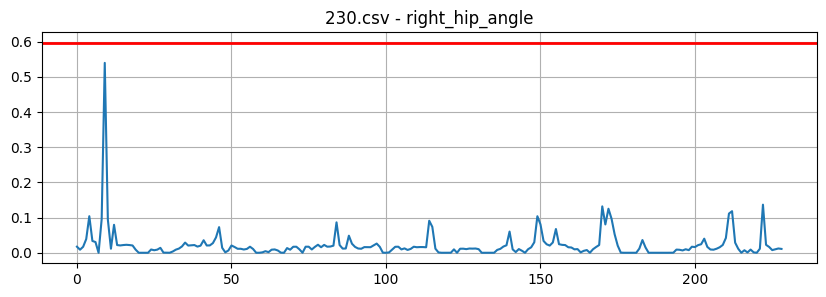

-Patient_number :  244.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 198
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.4097650598531083
-Anomaly points: 0


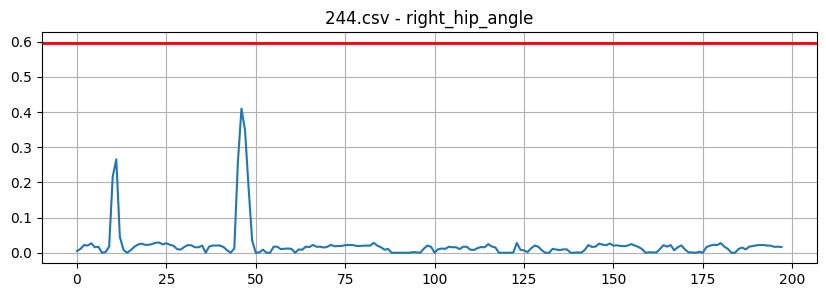

-Patient_number :  264.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 254
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.3987393367520268
-Anomaly points: 0


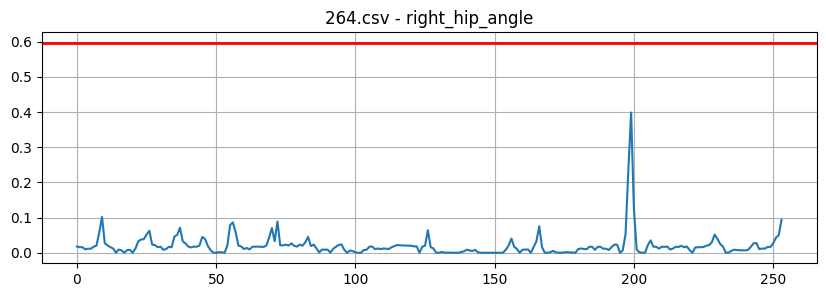

-Patient_number :  275.csv
9/9 [==============================] - 0s 4ms/step
-Data len : 264
-Anomaly Area : 0.0
-Reconstruction error threshold : 1.4702424799776903
-Anomaly points: 1


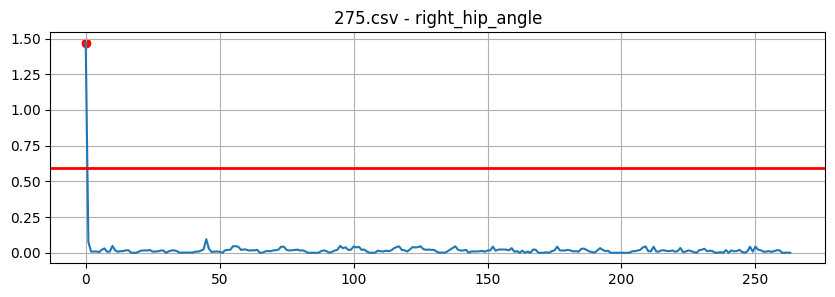

-Patient_number :  278.csv
10/10 [==============================] - 0s 4ms/step
-Data len : 292
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.2724830058279697
-Anomaly points: 0


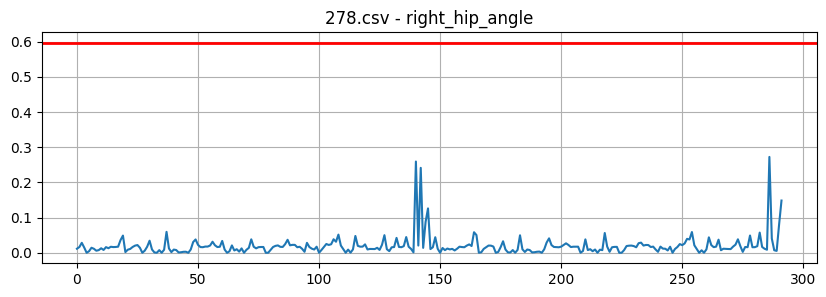

-Patient_number :  28.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 248
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.08853839184457657
-Anomaly points: 0


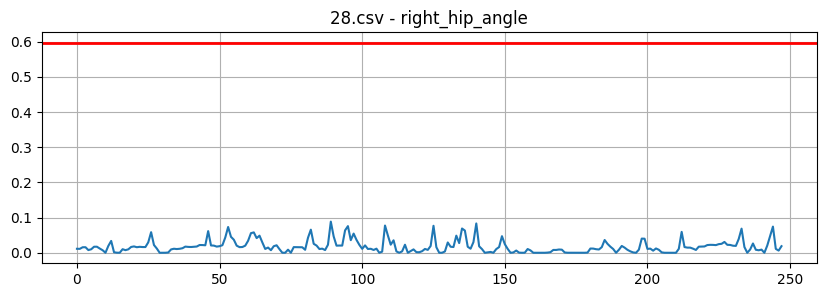

-Patient_number :  284.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 122
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.46347508648657315
-Anomaly points: 0


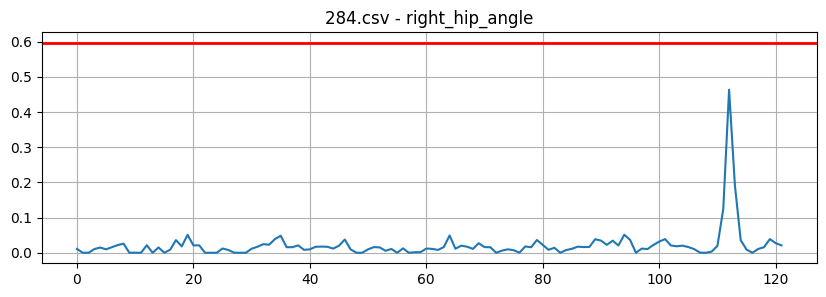

-Patient_number :  285.csv
8/8 [==============================] - 0s 5ms/step
-Data len : 235
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.13491661277728395
-Anomaly points: 0


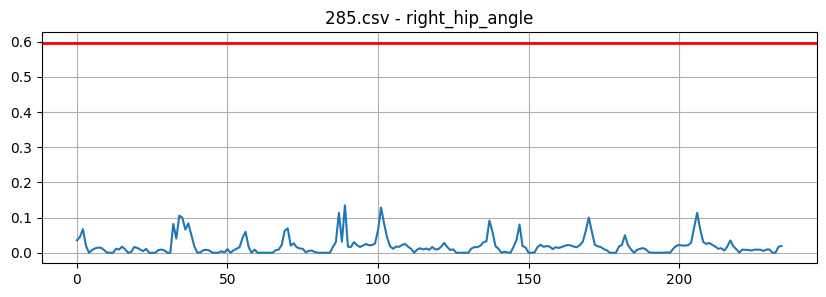

-Patient_number :  286.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 162
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.5219452435828295
-Anomaly points: 0


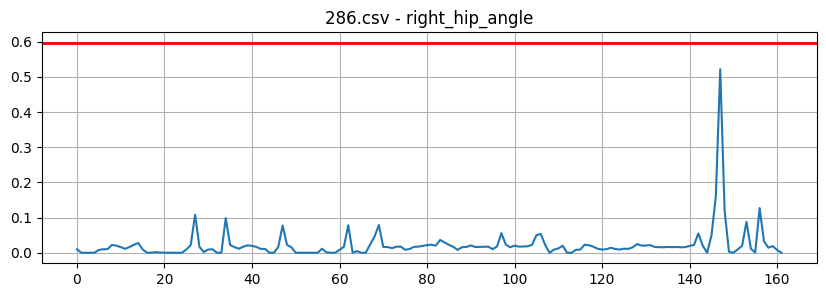

-Patient_number :  287.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 234
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.17719003910613104
-Anomaly points: 0


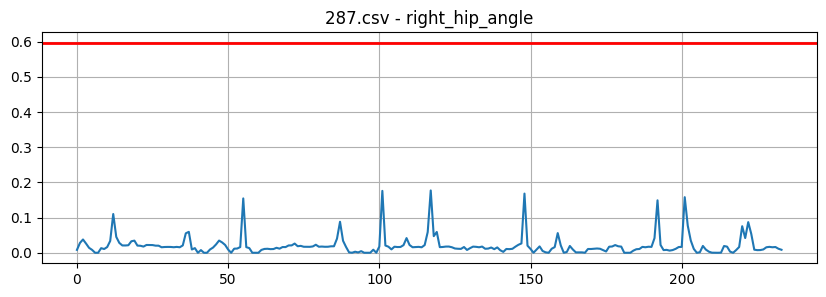

-Patient_number :  298.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 168
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.1700070740655488
-Anomaly points: 0


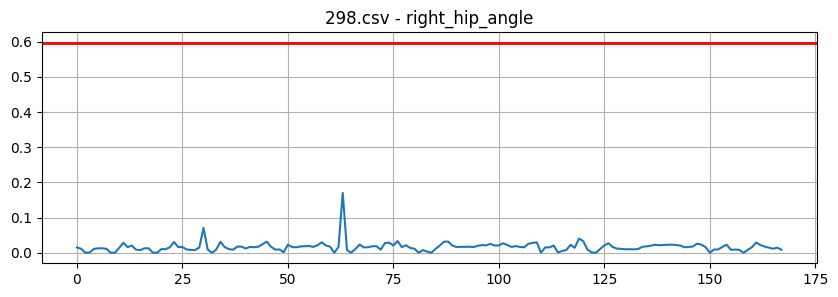

-Patient_number :  333.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 246
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.4287099093893955
-Anomaly points: 0


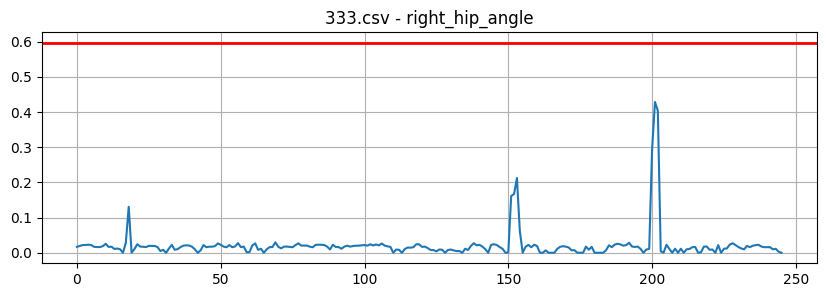

-Patient_number :  337.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 172
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.16150483751124706
-Anomaly points: 0


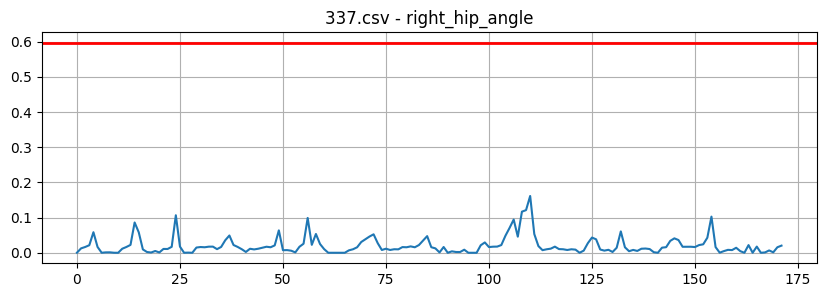

-Patient_number :  338.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 152
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.4571068684691651
-Anomaly points: 0


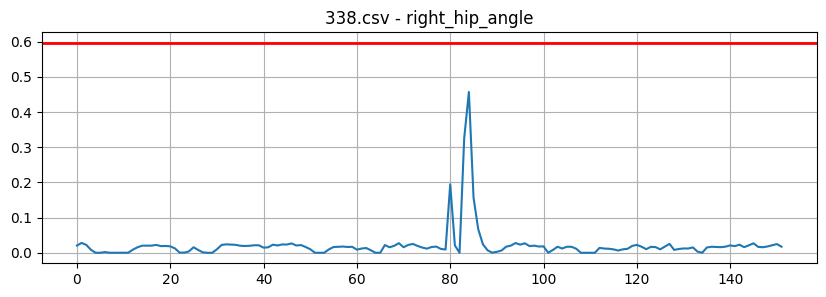

-Patient_number :  340.csv
6/6 [==============================] - 0s 5ms/step
-Data len : 165
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.18752015268588634
-Anomaly points: 0


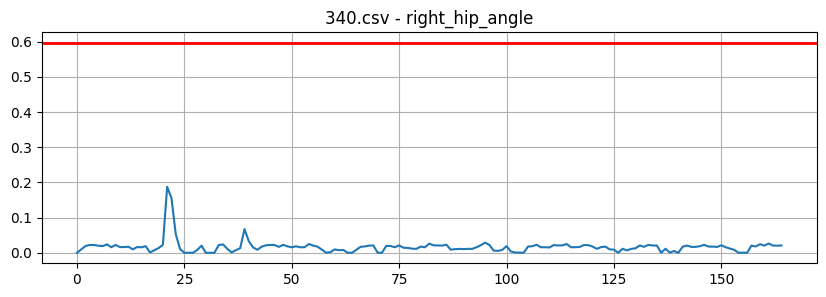

-Patient_number :  341.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 183
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.1145888167048567
-Anomaly points: 0


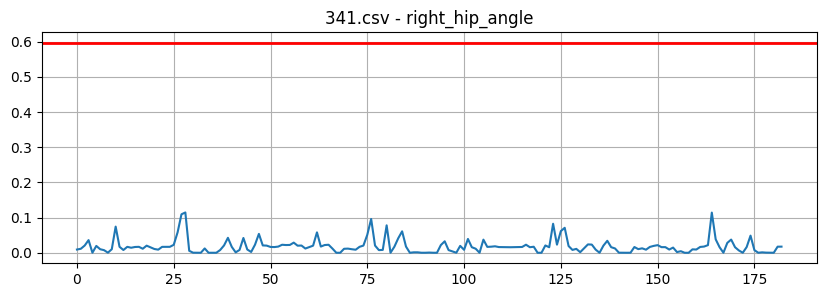

-Patient_number :  344.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 196
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.337545862204018
-Anomaly points: 0


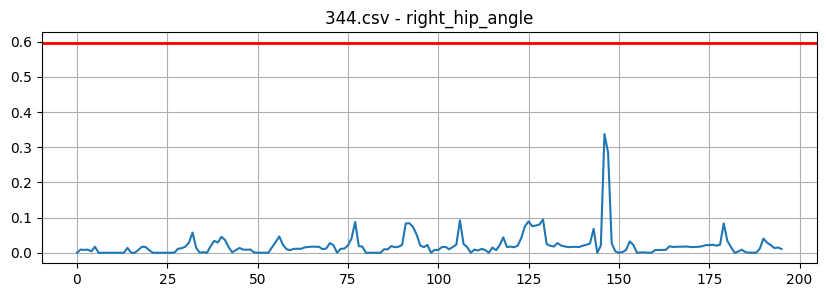

-Patient_number :  354.csv
9/9 [==============================] - 0s 4ms/step
-Data len : 263
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.4066794710068535
-Anomaly points: 0


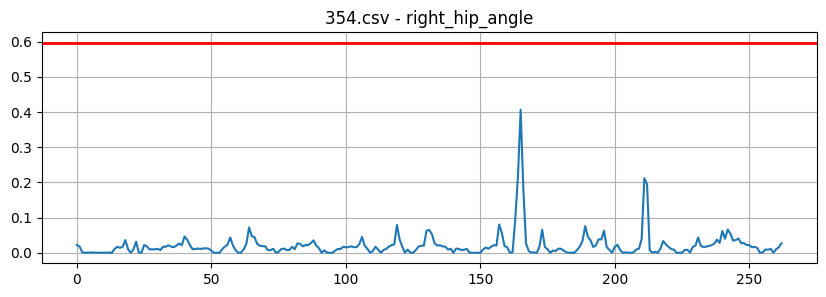

-Patient_number :  356.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 228
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.1414784961258253
-Anomaly points: 0


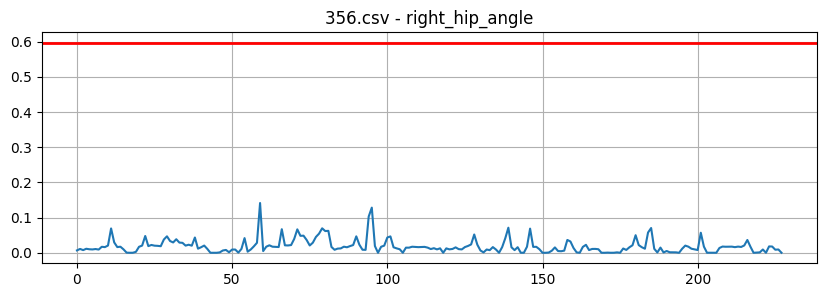

-Patient_number :  358.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 236
-max_anomaly :  1.3123646496873533
-min_anomaly :  0.7412542002086802
-Anomaly Area : 2.283718416502348
-Reconstruction error threshold : 1.3123646496873533
-Anomaly points: 3


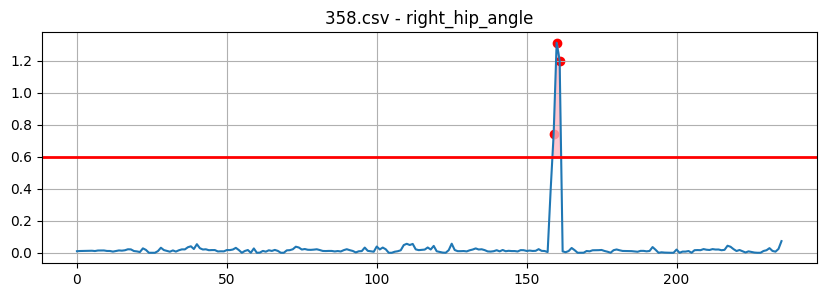

-Patient_number :  36.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 215
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.3971240017944168
-Anomaly points: 0


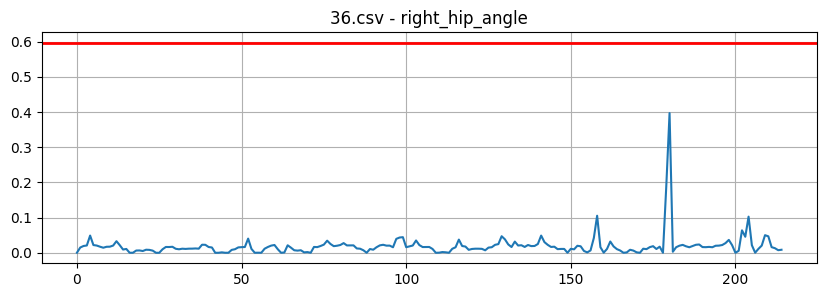

-Patient_number :  360.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 186
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.11661014954577421
-Anomaly points: 0


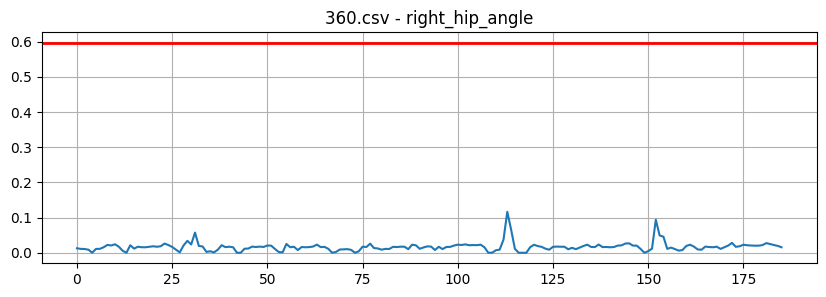

-Patient_number :  364.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 195
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.22001895685062178
-Anomaly points: 0


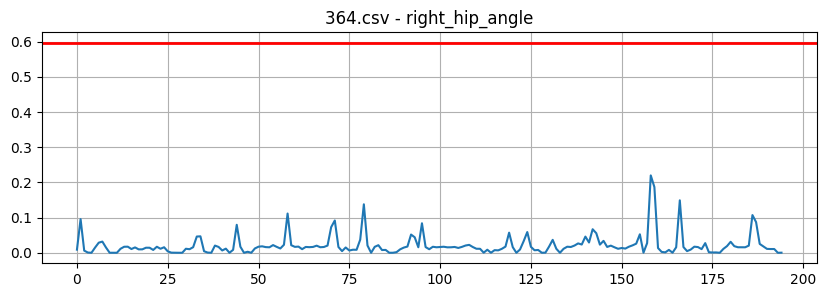

-Patient_number :  365.csv
2/2 [==============================] - 0s 5ms/step
-Data len : 63
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.17586477378982224
-Anomaly points: 0


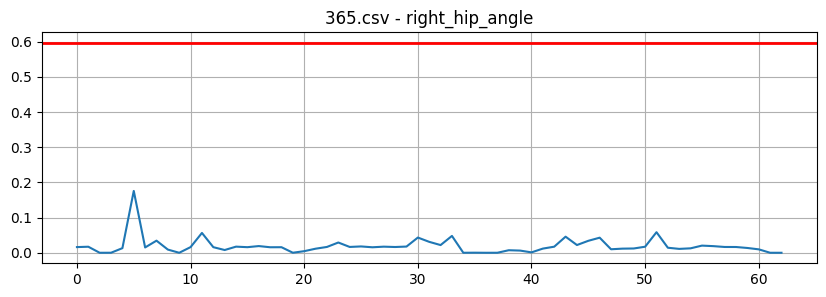

-Patient_number :  367.csv
9/9 [==============================] - 0s 4ms/step
-Data len : 259
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.3742084954959332
-Anomaly points: 0


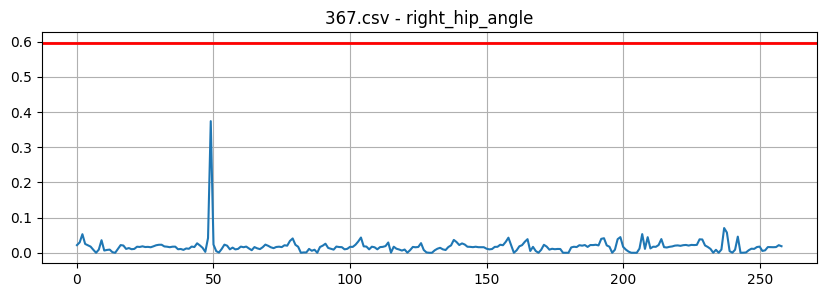

-Patient_number :  369.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 134
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.27128460507113433
-Anomaly points: 0


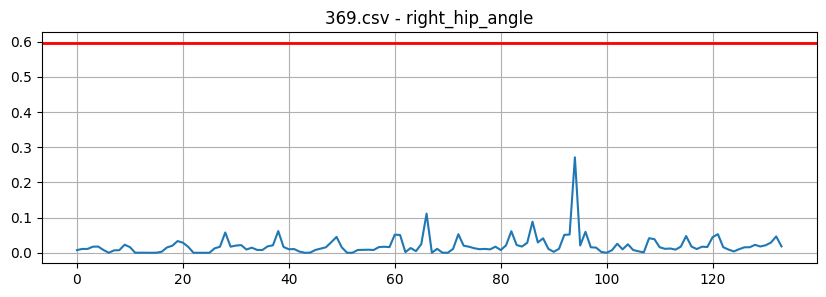

-Patient_number :  391.csv
12/12 [==============================] - 0s 4ms/step
-Data len : 362
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.7225842106791162
-Anomaly points: 1


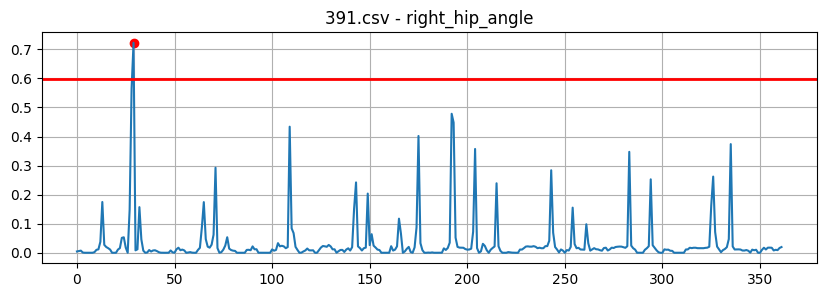

-Patient_number :  398.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 238
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.5594193154508204
-Anomaly points: 0


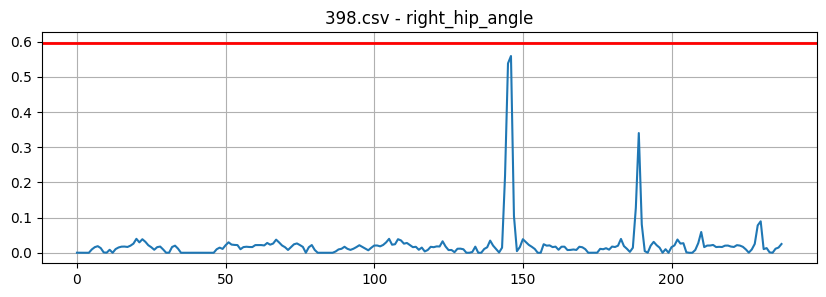

-Patient_number :  400.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 148
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.11171632714776658
-Anomaly points: 0


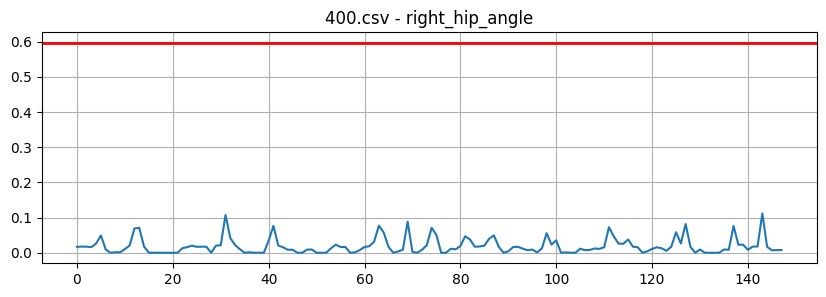

-Patient_number :  412.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 128
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.2942223494597413
-Anomaly points: 0


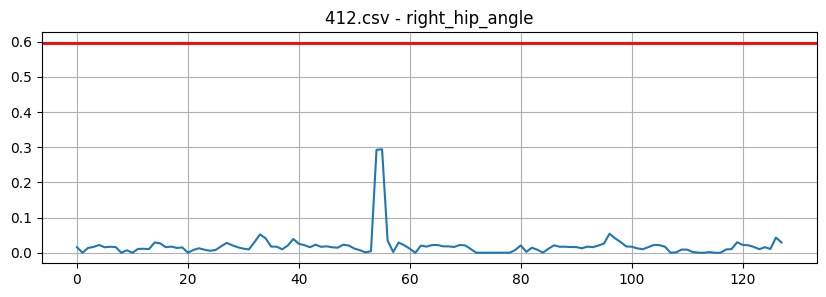

-Patient_number :  414.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 135
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.12784170595825817
-Anomaly points: 0


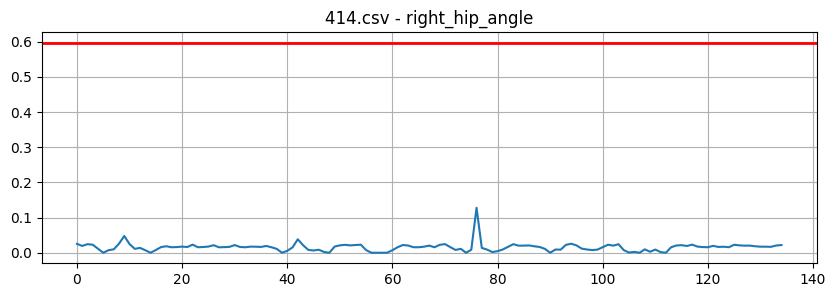

-Patient_number :  420.csv
3/3 [==============================] - 0s 6ms/step
-Data len : 95
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.0807799722501124
-Anomaly points: 0


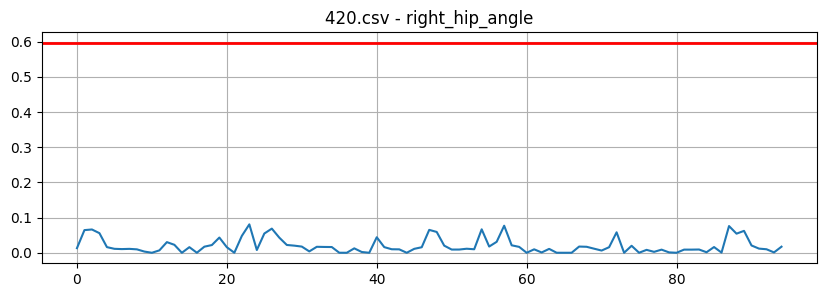

-Patient_number :  423.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 121
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.1667612036874783
-Anomaly points: 0


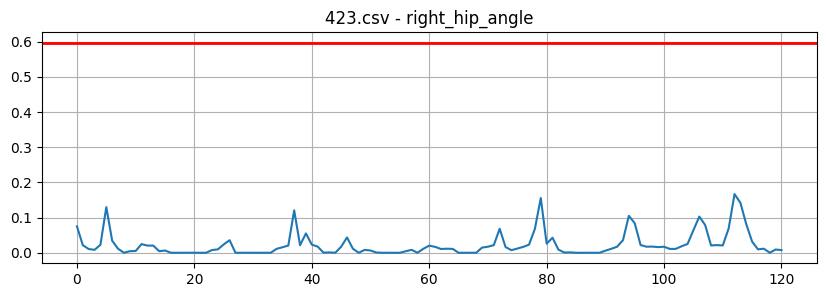

-Patient_number :  428.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 175
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.28786243019510876
-Anomaly points: 0


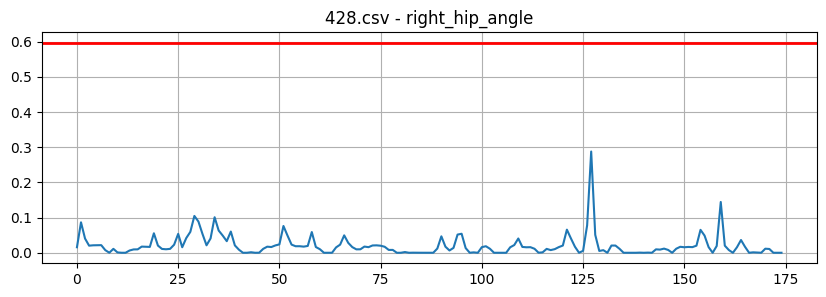

-Patient_number :  43.csv
6/6 [==============================] - 0s 5ms/step
-Data len : 175
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.14963503693482275
-Anomaly points: 0


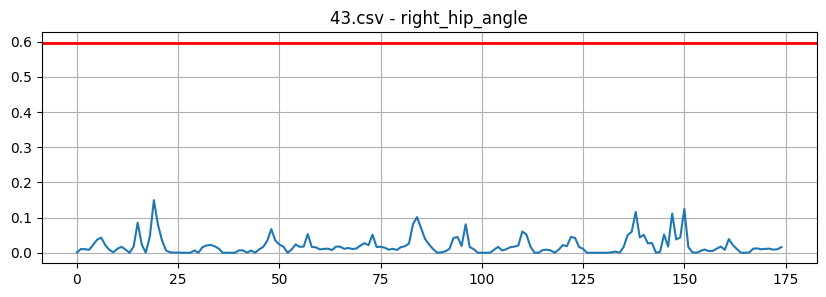

-Patient_number :  432.csv
6/6 [==============================] - 0s 4ms/step
-Data len : 173
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.0815600907312151
-Anomaly points: 0


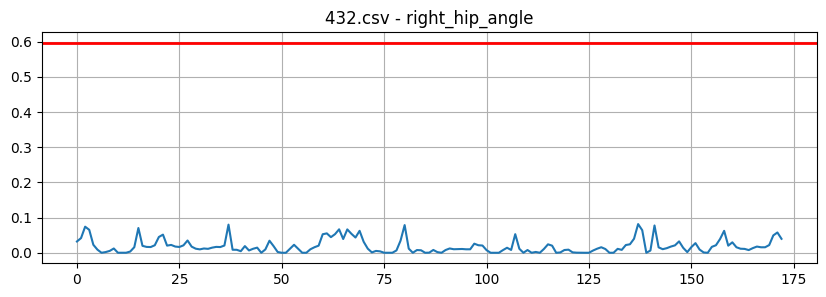

-Patient_number :  436.csv
10/10 [==============================] - 0s 4ms/step
-Data len : 302
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.555949198645811
-Anomaly points: 0


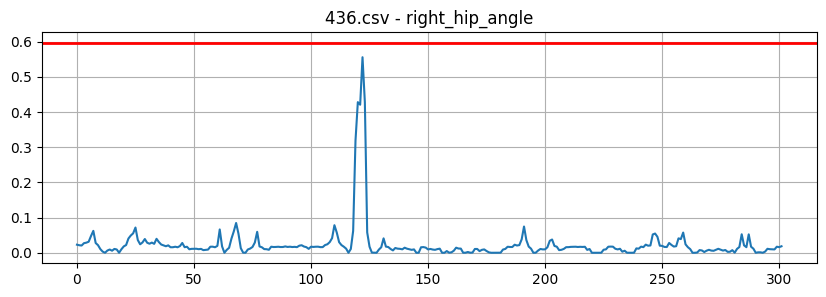

-Patient_number :  445.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 196
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.16719383085489545
-Anomaly points: 0


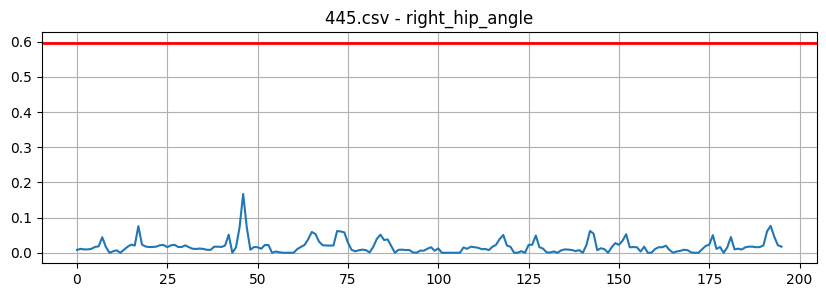

-Patient_number :  56.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 219
-max_anomaly :  1.156810623970595
-min_anomaly :  0.823718632199637
-Anomaly Area : 3.8018963333324622
-Reconstruction error threshold : 1.156810623970595
-Anomaly points: 5


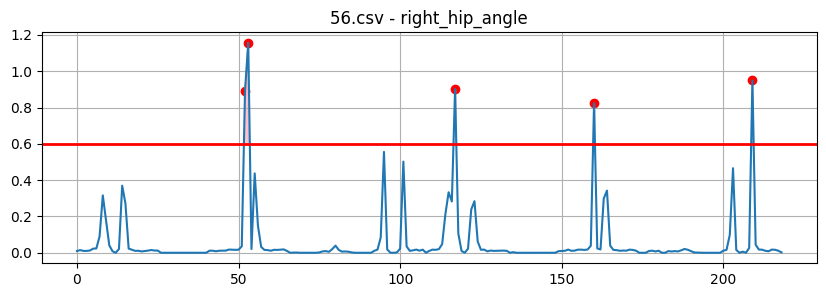

-Patient_number :  61.csv
4/4 [==============================] - 0s 4ms/step
-Data len : 101
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.25599046691872596
-Anomaly points: 0


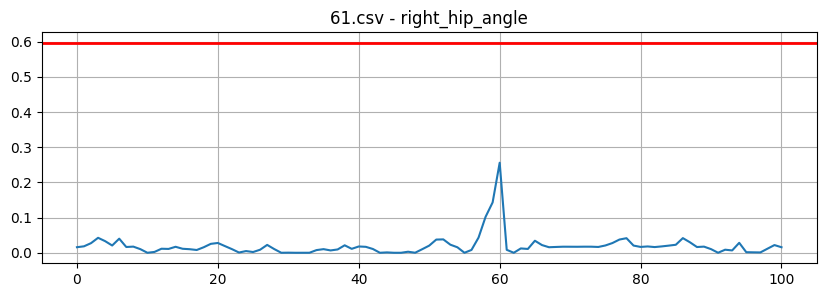

-Patient_number :  84.csv
7/7 [==============================] - 0s 4ms/step
-Data len : 217
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.18012289511157759
-Anomaly points: 0


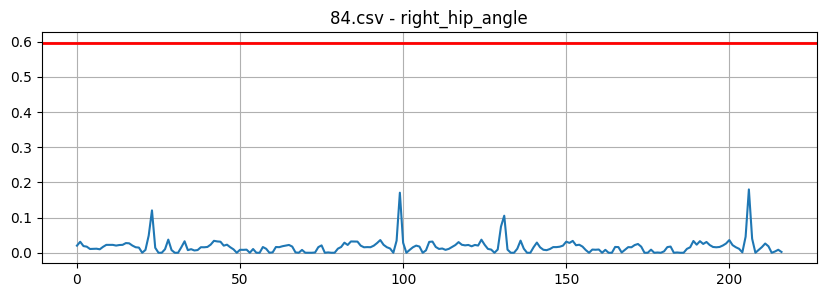

-Patient_number :  85.csv
5/5 [==============================] - 0s 4ms/step
-Data len : 131
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.12821272275086948
-Anomaly points: 0


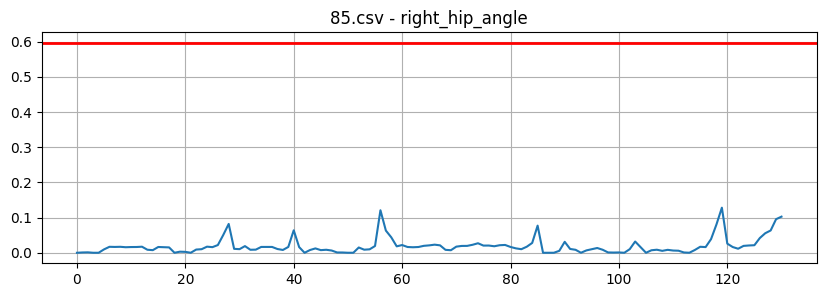

-Patient_number :  91.csv
8/8 [==============================] - 0s 4ms/step
-Data len : 232
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.09268580478592794
-Anomaly points: 0


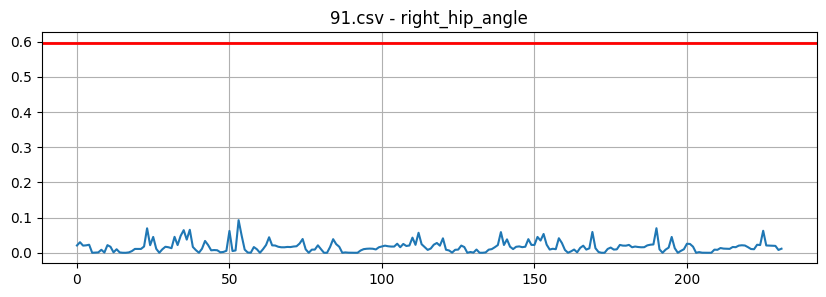

-Patient_number :  97.csv
6/6 [==============================] - 0s 5ms/step
-Data len : 188
-Anomaly Area : 0.0
-Reconstruction error threshold : 0.1421608542047602
-Anomaly points: 0


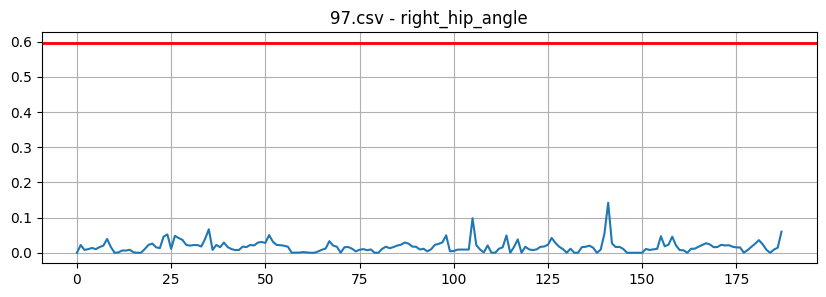

In [20]:
# inte_li = []
# indices = []
data_len = []
total_anomaly = []
total_anomaly_area = []
cont=0

for i in sar_csv:
    print("====================================================================================================")
    path = "test/sar_long_in/"+str(i)
    print("-Patient_number : ",i)
    
    test_sheet = pd.read_csv(path, index_col = 0).dropna()
    test_num = test_sheet[[angle]]
    test_num = scaler.fit_transform(test_num)
    test = np.reshape(test_num,(test_num.shape[0],1,1))
    test_x_predictions = lstm_ae.predict(test)
    test_mae_loss = np.mean(np.power(test_x_predictions - test,2), axis=1).flatten()
    
    real_a_point = test_sheet['tick']
    real_a_point_list = real_a_point.to_numpy().astype(int)
    
    ra = len(real_a_point_list)
    ta=len(test_mae_loss)
    
    if ra == ta:
        print("-Data len :",ta)
    
    data_len.append(ta)

    plt.figure(figsize = (10,3))
    plt.plot(test_mae_loss)
    plt.axhline(y=threshold_ave, color='red', linewidth=2)
    
    red_t = [] # 이상치 갯수 리스트 
    inte_li = []
    indices = []
    data_len = []
    

    red = 0
    
    for j in range(len(real_a_point_list)):
        
        if test_mae_loss[j] >= threshold_ave:
            above_threshold = test_mae_loss >= threshold_ave
            below_threshold = np.logical_not(above_threshold)
            plt.fill_between(np.arange(len(test_mae_loss)), test_mae_loss, threshold_ave, where=above_threshold, color='pink', alpha=0.5) #임계갓 윗 부분
            # plt.fill_betweenx(y=[0,threshold_ave], x1=j, x2=j+1, color='pink') #임계갓 아랫 부분 
            plt.scatter(j, test_mae_loss[j],c='r')
            red = 1
            inte = (test_mae_loss[j])

            inte_li.append(inte) # 이상치 값
            red_t.append(red) # 이상치 갯수 카운트 
            indices.append(j) # 이상치 인덱스 
            total_anomaly.append(inte)
            
    # print("-Anomaly_data : ",inte_li)
    
    if len(red_t) >= 2:
        print("-max_anomaly : ",max(inte_li))
        print("-min_anomaly : ",min(inte_li))

        
    # if len(red_t) <= 10:
    #     print("-중증도 : 1단계")
    # elif len(red_t) >= 10:
    #     print("-중증도 : 2단계")
    # else:
    #     print("-중증도 : 3단계")
    
    if red == 1:
        cont += 1
    
    loss_max = np.max(test_mae_loss)
    anomaly_area = np.trapz(inte_li)
    # total_anomaly_area.append(anomaly_area)
    
    plt.title(i + " - " + angle)
    plt.grid()
    name = i[:-4]
    # plt.savefig(name)
    
    print("-Anomaly Area :", anomaly_area)
    print(f'-Reconstruction error threshold : {loss_max}')
    print("-Anomaly points:",len(red_t))
    
    
    plt.show()


In [21]:
print("이상탐지 환자 수 : ",cont)

이상탐지 환자 수 :  9


=========================================================

# Nomal TEST

In [20]:
test_num = [23, 24, 25]

 1/14 [=>............................] - ETA: 0s

14/14 [==============================] - 0s 5ms/step
433


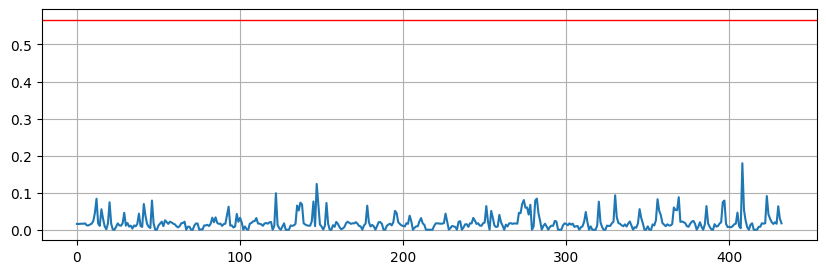

13/13 [==============================] - 0s 4ms/step
397


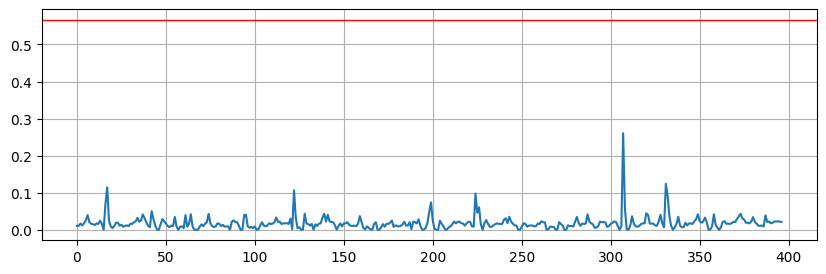

13/13 [==============================] - 0s 4ms/step
405


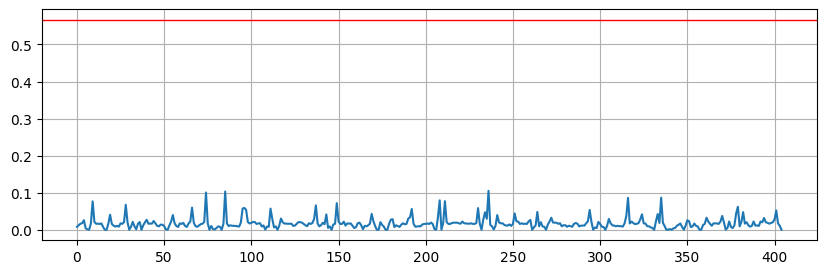

In [21]:
for i in test_num:
    number_num = number[number["num"]== i].dropna()
    number_num = number_num[[angle]]
    # number_num
    number_num = scaler.fit_transform(number_num)
    number_num = np.reshape(number_num,(number_num.shape[0],1,1))
    test_no_x_predictions= lstm_ae.predict(number_num)
    test_no_mae_loss = np.mean(np.power(test_no_x_predictions - number_num,2), axis=1).flatten()
    print(len(test_no_mae_loss))
    
    real_a_point_list = len(test_no_mae_loss)
    # real_a_point_list = real_a_point.to_numpy().astype(int)
    
    plt.figure(figsize = (10,3))
    plt.plot(test_no_mae_loss)
    plt.axhline(y=threshold_ave, color='red', linewidth=1)
    plt.grid()
    
    for j in range (real_a_point_list) :
        if test_no_mae_loss[j] >= threshold_ave:
            plt.scatter(j, test_no_mae_loss[j],c='r')         
    
    
    
    plt.show()
    
#     test_no_mae_loss_max = np.max(test_no_mae_loss)
#     print(f'Reconstruction error threshold: {test_no_mae_loss_max}')